In [21]:
## Name – Rohan Rashinkar
## Roll No – I4239
## Division – 2
## Practical - 2

In [22]:
# Implementing Feedforward neural networks with Keras and TensorFlow
# a. Import the necessary packages
# b. Load the training and testing data (MNIST/CIFAR10)
# c. Define the network architecture using Keras
# d. Train the model using SGD
# e. Evaluate the network
# f. Plot the training loss and accuracy

In [23]:
#!pip install tensorflow 

In [24]:
# import the necessary packages
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.datasets import mnist
from tensorflow.keras import backend as K
import matplotlib.pyplot as plt
import numpy as np
import argparse 

In [26]:
# grab the MNIST dataset (if this is your first time using this
# dataset then the 11MB download may take a minute)
print("[INFO] accessing MNIST...")
((trainX, trainY), (testX, testY)) = mnist.load_data()


# each image in the MNIST dataset is represented as a 28x28x1
# image, but in order to apply a standard neural network we must
# first "flatten" the image to be simple list of 28x28=784 pixels
trainX = trainX.reshape((trainX.shape[0], 28 * 28 * 1))
testX = testX.reshape((testX.shape[0], 28 * 28 * 1))


# scale data to the range of [0, 1]
trainX = trainX.astype("float32") / 255.0
testX = testX.astype("float32") / 255.0

[INFO] accessing MNIST...


In [27]:
# convert the labels from integers to vectors
lb = LabelBinarizer()
trainY = lb.fit_transform(trainY)
testY = lb.transform(testY)

In [11]:
# define the 784-256-128-10 architecture using Keras
model = Sequential()
model.add(Dense(256, input_shape=(784,), activation="sigmoid"))
model.add(Dense(128, activation="sigmoid"))
model.add(Dense(10, activation="softmax"))

In [12]:
# train the model using SGD
print("[INFO] training network...")
sgd = SGD(0.01)
model.compile(loss="categorical_crossentropy", optimizer=sgd,
    metrics=["accuracy"])
H = model.fit(trainX, trainY, validation_data=(testX, testY),
    epochs=100, batch_size=128)

[INFO] training network...
Epoch 1/100
469/469 [==============================] - 3s 5ms/step - loss: 2.2749 - accuracy: 0.1733 - val_loss: 2.2413 - val_accuracy: 0.2043
Epoch 2/100
469/469 [==============================] - 2s 5ms/step - loss: 2.2079 - accuracy: 0.3969 - val_loss: 2.1667 - val_accuracy: 0.4784
Epoch 3/100
469/469 [==============================] - 2s 5ms/step - loss: 2.1221 - accuracy: 0.5415 - val_loss: 2.0635 - val_accuracy: 0.5545
Epoch 4/100
469/469 [==============================] - 2s 5ms/step - loss: 1.9987 - accuracy: 0.6167 - val_loss: 1.9114 - val_accuracy: 0.6677
Epoch 5/100
469/469 [==============================] - 2s 5ms/step - loss: 1.8232 - accuracy: 0.6565 - val_loss: 1.7073 - val_accuracy: 0.6752
Epoch 6/100
469/469 [==============================] - 2s 5ms/step - loss: 1.6059 - accuracy: 0.6836 - val_loss: 1.4786 - val_accuracy: 0.7159
Epoch 7/100
469/469 [==============================] - 2s 5ms/step - loss: 1.3865 - accuracy: 0.7133 - val_loss: 1.

Epoch 58/100
469/469 [==============================] - 2s 5ms/step - loss: 0.3207 - accuracy: 0.9082 - val_loss: 0.3106 - val_accuracy: 0.9104
Epoch 59/100
469/469 [==============================] - 3s 7ms/step - loss: 0.3191 - accuracy: 0.9085 - val_loss: 0.3087 - val_accuracy: 0.9115
Epoch 60/100
469/469 [==============================] - 3s 6ms/step - loss: 0.3174 - accuracy: 0.9092 - val_loss: 0.3074 - val_accuracy: 0.9112
Epoch 61/100
469/469 [==============================] - 3s 6ms/step - loss: 0.3158 - accuracy: 0.9094 - val_loss: 0.3060 - val_accuracy: 0.9116
Epoch 62/100
469/469 [==============================] - 3s 5ms/step - loss: 0.3142 - accuracy: 0.9099 - val_loss: 0.3046 - val_accuracy: 0.9124
Epoch 63/100
469/469 [==============================] - 2s 5ms/step - loss: 0.3127 - accuracy: 0.9105 - val_loss: 0.3029 - val_accuracy: 0.9130
Epoch 64/100
469/469 [==============================] - 2s 5ms/step - loss: 0.3111 - accuracy: 0.9108 - val_loss: 0.3020 - val_accuracy:

In [13]:
# evaluate the network
print("[INFO] evaluating network...")
predictions = model.predict(testX, batch_size=128)
print(classification_report(testY.argmax(axis=1),
    predictions.argmax(axis=1),
    target_names=[str(x) for x in lb.classes_]))


[INFO] evaluating network...
79/79 [==============================] - 0s 3ms/step
              precision    recall  f1-score   support

           0       0.94      0.98      0.96       980
           1       0.97      0.98      0.97      1135
           2       0.92      0.91      0.91      1032
           3       0.90      0.91      0.91      1010
           4       0.92      0.93      0.93       982
           5       0.91      0.85      0.88       892
           6       0.93      0.95      0.94       958
           7       0.93      0.92      0.93      1028
           8       0.90      0.89      0.89       974
           9       0.91      0.90      0.90      1009

    accuracy                           0.92     10000
   macro avg       0.92      0.92      0.92     10000
weighted avg       0.92      0.92      0.92     10000



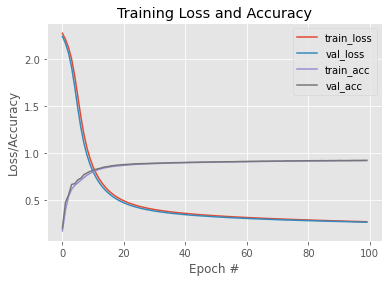

In [30]:
# plot the training loss and accuracy
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, 100), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, 100), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, 100), H.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, 100), H.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()
plt.savefig('accuracy.png')